In [ ]:
import os
import random

import cv2

In [22]:
pretrain_model_path = './ss/'

original_images_path = "./original_images/"
shadow_masks_path = './shadow_masks/'

# Loading Pre-trained Model

In [2]:
# loaded pretrained model and build the calculate graph
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from networks import build_shadow_generator

channel = 64

with tf.variable_scope(tf.get_variable_scope()):
    input=tf.placeholder(tf.float32,shape=[None,None,None,3])
    mask = tf.placeholder(tf.float32,shape=[None,None,None,1])

    # build the model
    # I_s = I_ns * I_sm
    shadowed_image = build_shadow_generator(tf.concat([input,mask], axis=3), channel) * input


sess=tf.Session()
sess.run(tf.global_variables_initializer())
idtd_ckpt = tf.train.get_checkpoint_state(pretrain_model_path)
saver_restore = tf.train.Saver([var for var in tf.trainable_variables()])
print('loaded '+ idtd_ckpt.model_checkpoint_path)
saver_restore.restore(sess, idtd_ckpt.model_checkpoint_path)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





loaded ss/lasted_model.ckpt
INFO:tensorflow:Restoring parameters from ss/lasted_model.ckpt


# Shadow Synthesis Example

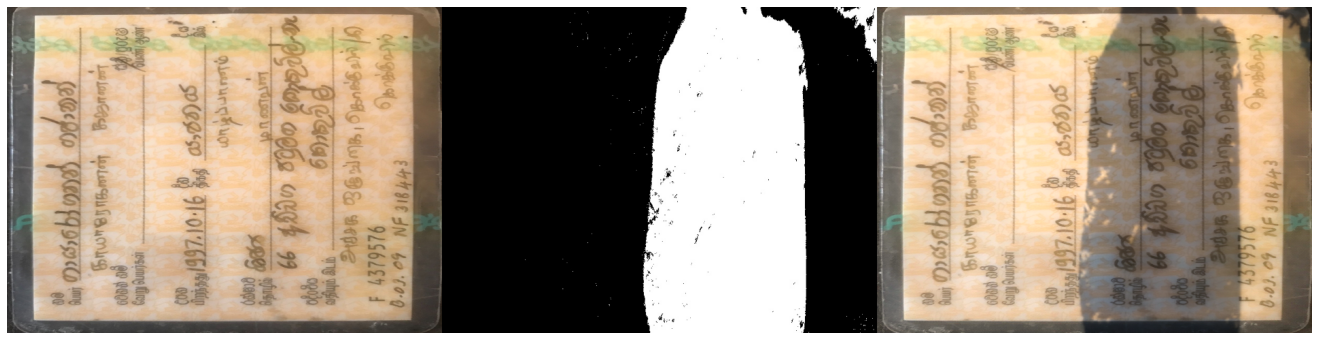

In [31]:
# some samples results.
plt.rcParams["figure.figsize"] = (24,6)

img_path = random.sample([os.path.join(original_images_path, x) for x in os.listdir(original_images_path)],1)[0]
mask_path = random.sample([os.path.join(shadow_masks_path, x) for x in os.listdir(shadow_masks_path)],1)[0]

plt.figure()
plt.axis('off')

iminput, immask = cv2.resize(cv2.imread(img_path,1),(640,480)),cv2.resize(cv2.imread(mask_path,1),(640,480))

imoutput = sess.run(shadowed_image,feed_dict={input:np.expand_dims(iminput/255.,axis=0),mask:np.expand_dims(immask[:,:,0:1]/255.,axis=0)})

imshadow = np.uint8(np.squeeze(np.minimum(np.maximum(imoutput,0.0),1.0))*255.0)
imcompare = np.concatenate([iminput,immask,imshadow],axis=1)

# bgr->rgb
plt.imshow(imcompare[...,::-1])
plt.show()

In [27]:
mask_path = random.sample([os.path.join(shadow_masks_path, x) for x in os.listdir(shadow_masks_path)],1)[0]
mask_path


'./shadow_masks/_MG_2759_1.jpg'